#### __This notebook is used to check for abnormalities during special events which could cause irrgegularities in the data.__
For example new years, eastern and covid isolation. 

_Common sources of PM10 particles include:_  
 dust from unsealed roads  
 smoke from fires  
 sea salt   
 car and truck exhausts  
 industry  

#### _To-Do:_  
- [ x ] Combine December and January of following years to gauge the spike of pm10 on new years  
- [ ] Look at March of a specific year outside of covid years  
- [ ] Get averages of each year and compare to average of covid years -- move this task to the seaborn notebook

#### _Unterstützende Quellen_
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json

# NEW YEARS 2024

In [2]:
file_path_dec_2023 = os.path.join("..", "mc124_data","mc124_data_2023_12.json")# join because different os use either \ or / as file path seperators
file_path_jan_2024 = os.path.join("..", "mc124_data","mc124_data_2024_01.json")
df_dec_2023 = pd.read_json(file_path_dec_2023)
df_jan_2024 = pd.read_json(file_path_jan_2024)
df_pm10_dec_2023 = df_dec_2023[(df_dec_2023['core'] == 'pm10')]
df_pm10_jan_2024 = df_jan_2024[(df_jan_2024['core'] == 'pm10')]
# ny_24 - new years 2024
df_pm10_dec23_jan_24 = pd.concat([df_pm10_dec_2023, df_pm10_jan_2024])
df_pm10_dec23_jan_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 0 to 3715
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   datetime   1488 non-null   datetime64[ns, UTC+01:00]
 1   station    1488 non-null   object                   
 2   core       1488 non-null   object                   
 3   component  1488 non-null   object                   
 4   period     1488 non-null   object                   
 5   value      1487 non-null   float64                  
dtypes: datetime64[ns, UTC+01:00](1), float64(1), object(4)
memory usage: 81.4+ KB


In [24]:
df_pm10_dec23_jan_24.sample()

,datetime,station,core,component,period,value
1340,2024-01-20 19:00:00+01:00,mc124,pm10,pm10_1h,1h,19.0


In [3]:
df_pm10_dec23_jan_24.tail(5)

,datetime,station,core,component,period,value
3695,2024-01-01 04:00:00+01:00,mc124,pm10,pm10_1h,1h,50.0
3700,2024-01-01 03:00:00+01:00,mc124,pm10,pm10_1h,1h,63.0
3705,2024-01-01 02:00:00+01:00,mc124,pm10,pm10_1h,1h,134.0
3710,2024-01-01 01:00:00+01:00,mc124,pm10,pm10_1h,1h,712.0
3715,2024-01-01 00:00:00+01:00,mc124,pm10,pm10_1h,1h,88.0


In [35]:
plot_df.index

DatetimeIndex(['2023-12-31 23:00:00+01:00', '2023-12-31 22:00:00+01:00',
               '2023-12-31 21:00:00+01:00', '2023-12-31 20:00:00+01:00',
               '2023-12-31 19:00:00+01:00', '2023-12-31 18:00:00+01:00',
               '2023-12-31 17:00:00+01:00', '2023-12-31 16:00:00+01:00',
               '2023-12-31 15:00:00+01:00', '2023-12-31 14:00:00+01:00',
               ...
               '2024-01-01 09:00:00+01:00', '2024-01-01 08:00:00+01:00',
               '2024-01-01 07:00:00+01:00', '2024-01-01 06:00:00+01:00',
               '2024-01-01 05:00:00+01:00', '2024-01-01 04:00:00+01:00',
               '2024-01-01 03:00:00+01:00', '2024-01-01 02:00:00+01:00',
               '2024-01-01 01:00:00+01:00', '2024-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, UTC+01:00]', name='datetime', length=1488, freq=None)

In [37]:
plot_df.sort_index().index

DatetimeIndex(['2023-12-01 00:00:00+01:00', '2023-12-01 01:00:00+01:00',
               '2023-12-01 02:00:00+01:00', '2023-12-01 03:00:00+01:00',
               '2023-12-01 04:00:00+01:00', '2023-12-01 05:00:00+01:00',
               '2023-12-01 06:00:00+01:00', '2023-12-01 07:00:00+01:00',
               '2023-12-01 08:00:00+01:00', '2023-12-01 09:00:00+01:00',
               ...
               '2024-01-31 14:00:00+01:00', '2024-01-31 15:00:00+01:00',
               '2024-01-31 16:00:00+01:00', '2024-01-31 17:00:00+01:00',
               '2024-01-31 18:00:00+01:00', '2024-01-31 19:00:00+01:00',
               '2024-01-31 20:00:00+01:00', '2024-01-31 21:00:00+01:00',
               '2024-01-31 22:00:00+01:00', '2024-01-31 23:00:00+01:00'],
              dtype='datetime64[ns, UTC+01:00]', name='datetime', length=1488, freq=None)

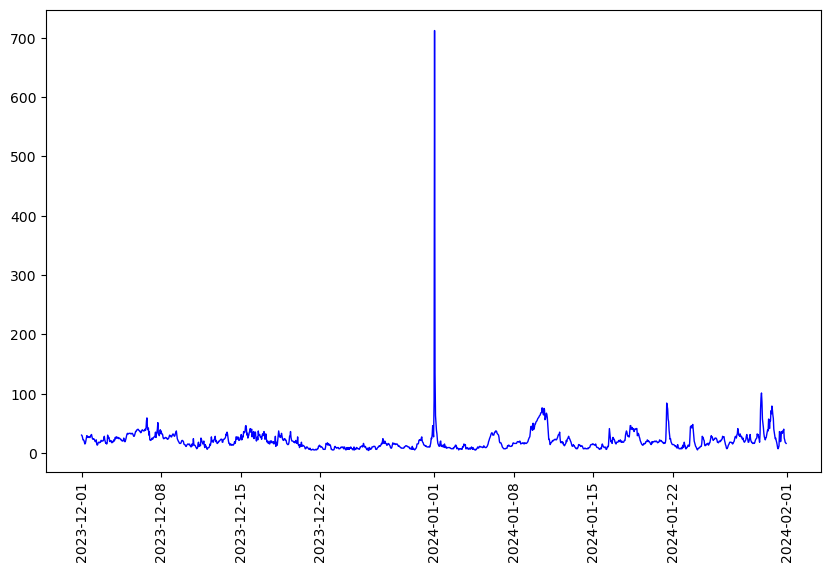

In [54]:
plot_df_dec23_jan24 = df_pm10_dec23_jan_24.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(plot_df_dec23_jan24[['value']], color="blue", linewidth=1)

In [6]:
df_pm10_dec23_jan_24.describe()

,value
count,1487.000000
mean,20.807666
std,22.266993
min,4.000000
25%,11.000000
50%,18.000000
75%,26.000000
max,712.000000


### 31.12.2023 & 01.01.2024

In [55]:
# Multiple days
# targeting Dec 31st 2023 + Jan 01st 2024
start_date = '2023-12-31'
end_date = '2024-01-01'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_ny_2024 = df_pm10_dec23_jan_24[(df_pm10_dec23_jan_24['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_dec23_jan_24['datetime'].dt.date <= end_date.date())]

df_filtered_ny_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 3715
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   datetime   48 non-null     datetime64[ns, UTC+01:00]
 1   station    48 non-null     object                   
 2   core       48 non-null     object                   
 3   component  48 non-null     object                   
 4   period     48 non-null     object                   
 5   value      48 non-null     float64                  
dtypes: datetime64[ns, UTC+01:00](1), float64(1), object(4)
memory usage: 2.6+ KB


In [58]:
df_filtered_ny_2024.head(2)

,datetime,station,core,component,period,value
0,2023-12-31 23:00:00+01:00,mc124,pm10,pm10_1h,1h,27.0
5,2023-12-31 22:00:00+01:00,mc124,pm10,pm10_1h,1h,34.0


In [59]:
df_filtered_ny_2024.tail(2)

,datetime,station,core,component,period,value
3710,2024-01-01 01:00:00+01:00,mc124,pm10,pm10_1h,1h,712.0
3715,2024-01-01 00:00:00+01:00,mc124,pm10,pm10_1h,1h,88.0


In [65]:
def cutDatetimeToHour(datetime):
    return datetime.hour

plot_df_filtered_ny_2024["hour"] = plot_df_filtered_ny_2024["datetime"].map(cutDatetimeToHour)

KeyError: 'datetime'

<function matplotlib.pyplot.show(close=None, block=None)>

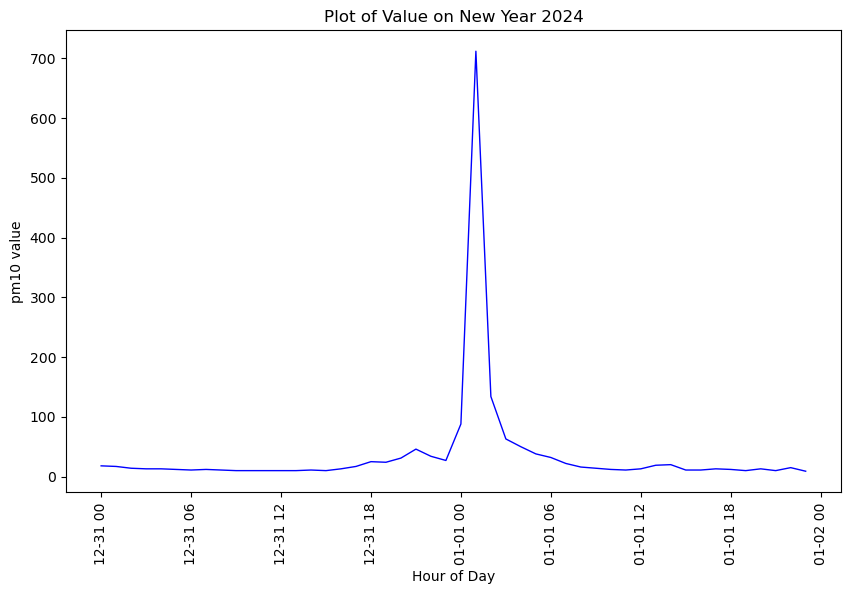

In [66]:
plot_df_filtered_ny_2024 = df_filtered_ny_2024.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.plot(plot_df_filtered_ny_2024[['value']], color="blue", linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on New Year 2024')
#plt.xticks(plot_df_filtered_ny_2024['hour']) # TODO map to hour before
plt.show

### 31.12.2023 20:00 - 01.01.2024 04:00

In [28]:
# Multiple days
#targeting specific days which show abnormal numbers:
start_date_hour = '2023-12-31 20:00:00+01:00' #2024-01-20 19:00:00+01:00
end_date_hour = '2024-01-01 04:00:00+01:00'

# Convert the dates to datetime objects
start_datetime_hour = pd.to_datetime(start_date_hour)
end_datetime_hour = pd.to_datetime(end_date_hour)

# Filter the dataframe for the specified date range
df_filtered_ny_2024_focus = df_filtered_ny_2024[(df_filtered_ny_2024['datetime'] >= start_datetime_hour) & 
                                           (df_filtered_ny_2024['datetime'] <= end_datetime_hour)]

df_filtered_ny_2024_focus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 3715
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   datetime   9 non-null      datetime64[ns, UTC+01:00]
 1   station    9 non-null      object                   
 2   core       9 non-null      object                   
 3   component  9 non-null      object                   
 4   period     9 non-null      object                   
 5   value      9 non-null      float64                  
dtypes: datetime64[ns, UTC+01:00](1), float64(1), object(4)
memory usage: 504.0+ bytes


In [ ]:
# mapping to the hour?? or day and hour

In [31]:
df_filtered_ny_2024_focus

,datetime,station,core,component,period,value
0,2023-12-31 23:00:00+01:00,mc124,pm10,pm10_1h,1h,27.0
5,2023-12-31 22:00:00+01:00,mc124,pm10,pm10_1h,1h,34.0
10,2023-12-31 21:00:00+01:00,mc124,pm10,pm10_1h,1h,46.0
15,2023-12-31 20:00:00+01:00,mc124,pm10,pm10_1h,1h,31.0
3695,2024-01-01 04:00:00+01:00,mc124,pm10,pm10_1h,1h,50.0
3700,2024-01-01 03:00:00+01:00,mc124,pm10,pm10_1h,1h,63.0
3705,2024-01-01 02:00:00+01:00,mc124,pm10,pm10_1h,1h,134.0
3710,2024-01-01 01:00:00+01:00,mc124,pm10,pm10_1h,1h,712.0
3715,2024-01-01 00:00:00+01:00,mc124,pm10,pm10_1h,1h,88.0


<function matplotlib.pyplot.show(close=None, block=None)>

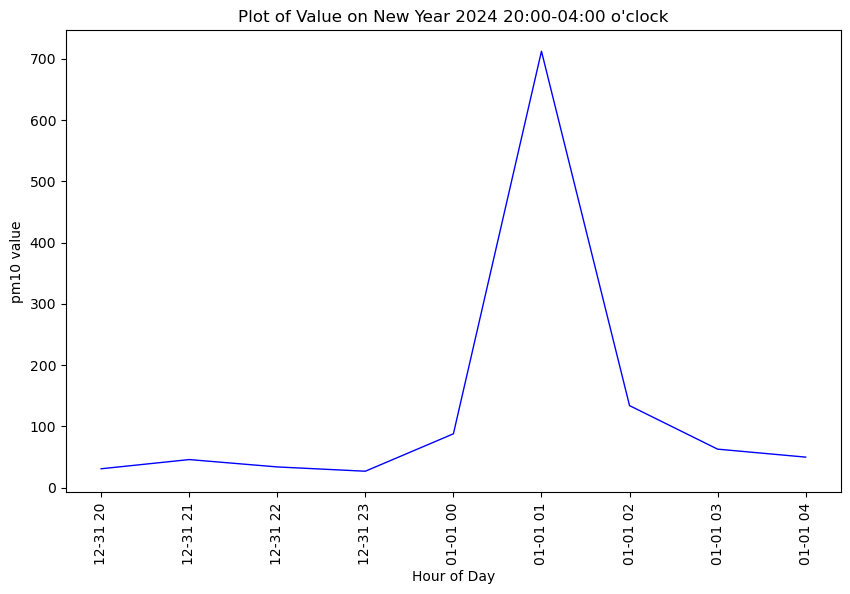

In [67]:
plot_df_filtered_ny_2024_focus = df_filtered_ny_2024_focus.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.plot(plot_df_filtered_ny_2024_focus[['value']], color="blue", linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f"Plot of Value on New Year 2024 20:00-04:00 o'clock")
#plt.xticks(plot_df_filtered_ny_2024['hour']) # TODO map to hour before
plt.show